# Import

In [7]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier


# Preprocessing

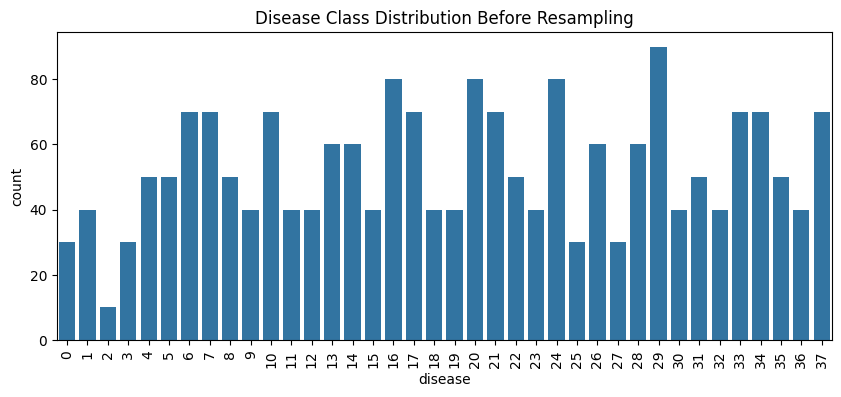

Resampled Class Distribution:
 disease
29    90
20    90
16    90
24    90
7     90
17    90
34    90
10    90
37    90
6     90
33    90
21    90
26    90
13    90
28    90
14    90
8     90
31    90
35    90
22    90
5     90
4     90
18    90
23    90
1     90
12    90
30    90
32    90
11    90
9     90
36    90
15    90
19    90
27    90
3     90
25    90
0     90
2     90
Name: count, dtype: int64


In [13]:
data = pd.read_csv(r"C:\Users\2023\Desktop\Practical ML&DL project\Disease Prediction\improved_disease_dataset.csv")

encoder = LabelEncoder()
data['disease'] = encoder.fit_transform(data['disease'])

x = data.iloc[:, :-1]
y = data.iloc[:, -1]

plt.figure(figsize=(10, 4))
sns.countplot(x=y)
plt.title("Disease Class Distribution Before Resampling")
plt.xticks(rotation=90)
plt.show()

ros = RandomOverSampler(random_state=42)
x_resampled, y_resampled = ros.fit_resample(x, y)

print("Resampled Class Distribution:\n", pd.Series(y_resampled).value_counts())

# Models

In [9]:
if 'gender' in x_resampled.columns:
    le = LabelEncoder()
    x_resampled['gender'] = le.fit_transform(x_resampled['gender'])
    
x_resampled = x_resampled.fillna(0)

if len(y_resampled.shape) > 1:
    y_resampled = y_resampled.values.ravel()
    
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

cv_scoring = "accuracy"
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for model_name, model in models.items():
    try:
        scores = cross_val_score(
            model,
            x_resampled,
            y_resampled,
            cv=stratified_kfold,
            scoring=cv_scoring,
            n_jobs=-1,
            error_score='raise'
        )
        print("=" * 50)
        print(f"Model: {model_name}")
        print(f"Score: {scores}")
        print(f"Mean Accuracy: {scores.mean():.4f}")
    except Exception as e:
        print("=", * 50)
        print(f"Model: {model_name} failed with error:")
        print(e)

Model: Decision Tree
Score: [0.5497076  0.54532164 0.53216374 0.53654971 0.52777778]
Mean Accuracy: 0.5383
Model: Random Forest
Score: [0.55116959 0.5628655  0.53508772 0.54385965 0.53216374]
Mean Accuracy: 0.5450


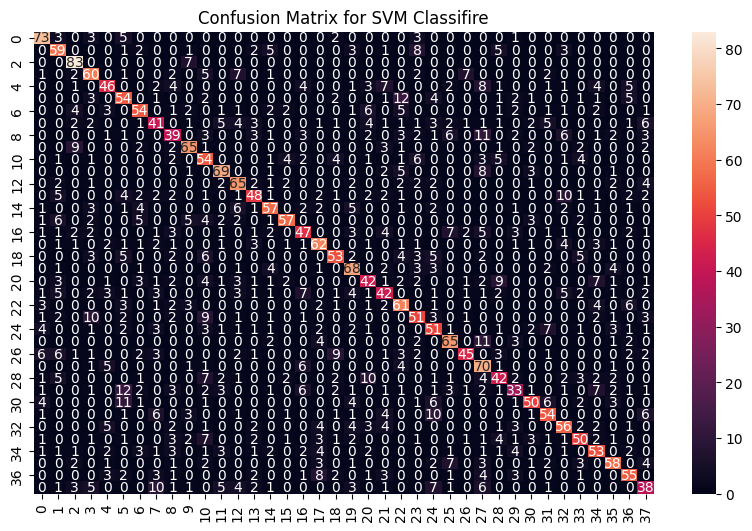

SVM Accuracy: 60.53%


In [11]:
svm_model = SVC()
svm_model.fit(x_resampled, y_resampled)
svm_preds = svm_model.predict(x_resampled)

cf_matrix_svm = confusion_matrix(y_resampled, svm_preds)
plt.figure(figsize=(10, 6))
sns.heatmap(cf_matrix_svm, annot=True, fmt='d')
plt.title("Confusion Matrix for SVM Classifire")
plt.show()

print(f"SVM Accuracy: {accuracy_score(y_resampled, svm_preds) * 100:.2f}%")

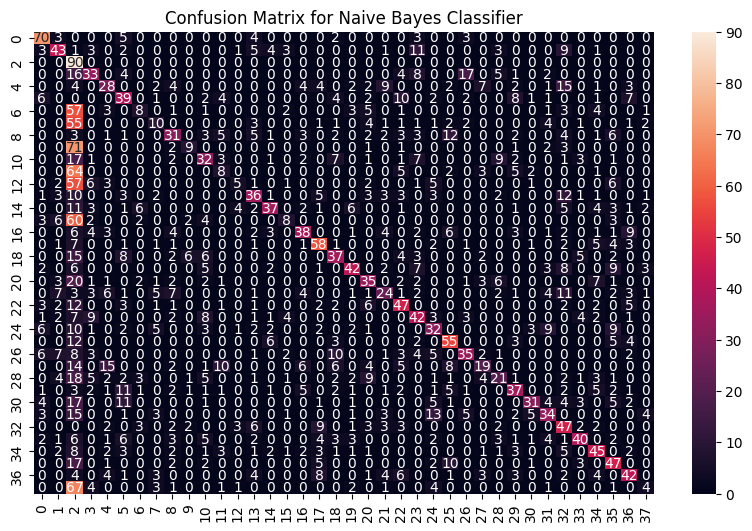

Naive Bayes Accuracy: 37.98%


In [16]:
nb_model = GaussianNB()
nb_model.fit(x_resampled, y_resampled)
nb_preds = nb_model.predict(x_resampled)

cf_matrix_nb = confusion_matrix(y_resampled, nb_preds)
plt.figure(figsize=(10, 6))
sns.heatmap(cf_matrix_nb, annot=True, fmt='d')
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()

print(f"Naive Bayes Accuracy: {accuracy_score(y_resampled, nb_preds) * 100:.2f}%")

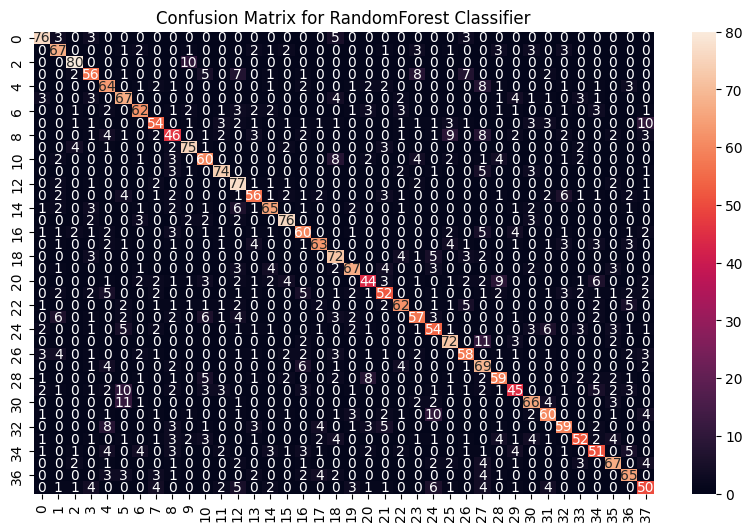

RandomForest Accuracy: 68.98%


In [17]:
rf_model = RandomForestClassifier()
rf_model.fit(x_resampled, y_resampled)
rf_preds = rf_model.predict(x_resampled)

cf_matrix_rf = confusion_matrix(y_resampled, rf_preds)
plt.figure(figsize=(10, 6))
sns.heatmap(cf_matrix_rf, annot=True, fmt='d')
plt.title("Confusion Matrix for RandomForest Classifier")
plt.show()

print(f"RandomForest Accuracy: {accuracy_score(y_resampled, rf_preds) * 100:.2f}%")

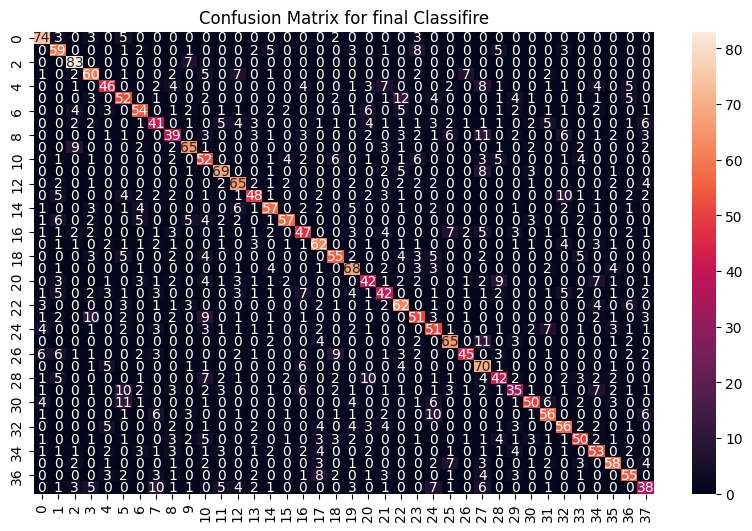

Final Accuracy: 60.64%


In [19]:
from statistics import mode

final_preds = [mode([i, j, k]) for i, j, k in zip(svm_preds, nb_preds, rf_preds)]

cf_matrix_final = confusion_matrix(y_resampled, final_preds)

plt.figure(figsize=(10, 6))
sns.heatmap(cf_matrix_final, annot=True, fmt='d')
plt.title('Confusion Matrix for final Classifire')
plt.show()

print(f"Final Accuracy: {accuracy_score(y_resampled, final_preds) * 100:.2f}%")

In [23]:
symptoms = x.columns.values
symptoms_index = {symptoms: idx for idx, symptoms in enumerate(symptoms)}

def predict_disease(input_symptoms):
    input_symptoms = input_symptoms.split(",")
    input_data = [0] * len(symptoms_index)
    
    for symptoms in input_symptoms:
        if symptoms in symptoms_index:
            input_data[symptoms_index[symptoms]] = 1
            
    input_data = np.array(input_data).reshape(1, -1)
    
    rf_pred = encoder.classes_[rf_model.predict(input_data)[0]]
    nb_pred = encoder.classes_[nb_model.predict(input_data)[0]]
    svm_pred = encoder.classes_[svm_model.predict(input_data)[0]]
    
    final_pred = mode([rf_pred, nb_pred, svm_pred])
    
    return {
        "Random Forest Prediction": rf_pred,
        "Naive Bayes Prediction": nb_pred,
        "SVM Prediction": svm_pred,
        "Final Prediction": final_pred
    }
    
print(predict_disease("Itching,Skin Rash,Nodal Skin Eruptions"))

c:\Users\2023\anaconda3\envs\tf-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\2023\anaconda3\envs\tf-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\Users\2023\anaconda3\envs\tf-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


{'Random Forest Prediction': 'Heart attack', 'Naive Bayes Prediction': 'Urinary tract infection', 'SVM Prediction': 'Impetigo', 'Final Prediction': 'Heart attack'}
